In [162]:
import numpy as np
import matplotlib.pyplot as plt 
import math
#from pandas_datareader import data
from statsmodels.tsa import stattools
#from statsmodels.tsa import arima_model
from statsmodels.graphics import gofplots
from statsmodels.regression import linear_model
from scipy import stats
#import csv
#from pandas_datareader import data
#from arch.unitroot import PhillipsPerron
import yfinance as yf
#from statsmodels.tsa import vector_ar
from sklearn.linear_model import LinearRegression
#import types

In [163]:
#these are tickers from Ernest Chan's book
ticker = 'EWC'
start_date = '2006-01-01'
end_date = '2012-01-01'
stock_data = yf.download(ticker, start_date, end_date)
price = list(stock_data['Adj Close'])

[*********************100%***********************]  1 of 1 completed


In [164]:
ticker = 'EWA'
stock_data = yf.download(ticker, start_date, end_date)
price2 = list(stock_data['Adj Close'])

[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.show(close=None, block=None)>

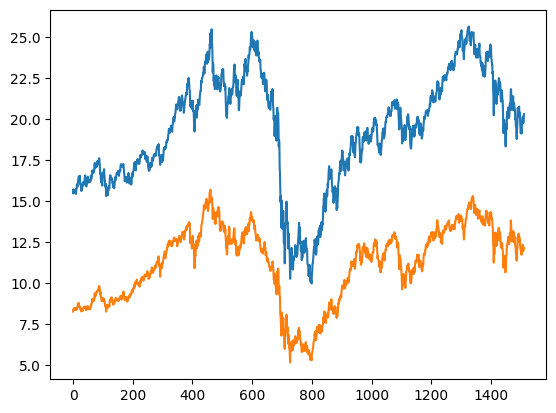

In [165]:
plt.plot(price)
plt.plot(price2)
plt.show

1.4247834581674823


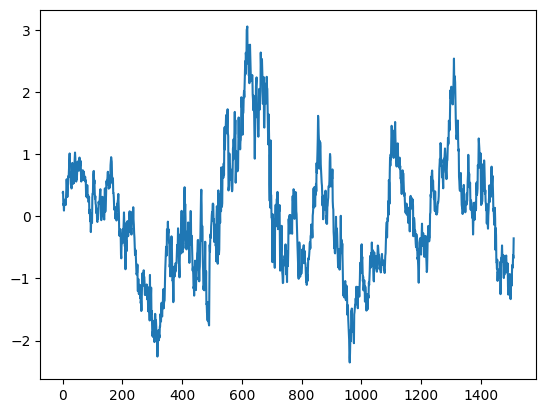

In [166]:
#We can compute the cointegration constant using regression on prices 
c1 = stats.linregress(price2,price)[0]
Z1 = np.array(price)-np.array(price2)*c1
Z1 = Z1-np.mean(Z1)
plt.plot(Z1)
print(c1)

In [167]:
#run Dickey-Fuller test to check the cointegration
my_DF = stattools.adfuller(Z1,1,'c',None)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested
phi, sigma = linear_model.yule_walker(Z1,order=1)
print(phi)

-3.6690837208242644
0.004569643317208158
1
[0.97653029]


1.0923672357392855


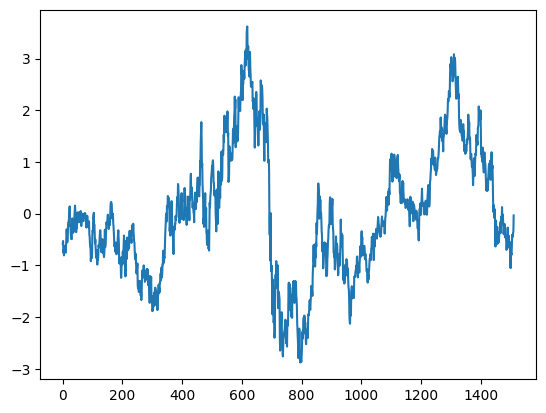

In [168]:
#We can compute the cointegration constant using regression on prices increments 
c1 = stats.linregress(np.diff(price2),np.diff(price))[0]
Z1 = np.array(price)-np.array(price2)*c1
Z1 = Z1-np.mean(Z1)
plt.plot(Z1)
print(c1)

In [169]:
#run Dickey-Fuller test to check the cointegration
my_DF = stattools.adfuller(Z1,1,'c',None)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested
phi, sigma = linear_model.yule_walker(Z1,order=1)
print(phi)

-2.8465655527316436
0.05192389453220068
1
[0.98803292]


In [170]:
#We can compute the cointegration constant using Johansen's method 
# compute a two-dimensional TS of the incremnets of two prices
dx = [np.diff(price[:-1])]
dx.append(np.diff(price2[:-1]))
dx = np.array(dx).T
print(dx.shape)
dy = [np.diff(price[1:])]
dy.append(np.diff(price2[1:]))
dy = np.array(dy).T
print(dy.shape)

(1509, 2)
(1509, 2)


In [171]:
#compute the cointegration constant via regression applied to the two-dimensional TS of price increments
reg_results = LinearRegression().fit(dx,dy)
print(reg_results.coef_)
Phi = reg_results.coef_+np.identity(2)
print("Phi=")
print(Phi)
res = [dy[i,:] - dx[i,:]@reg_results.coef_.T for i in range(len(dy[:,0]))]
rho, v = np.linalg.eig(Phi.T)
print("rho=")
print(rho)
print("v=")
print(v)
print(rho[1].imag==0)
#two possible cointegration constants/
c=[-v[1,0]/v[0,0],-v[1,1]/v[0,1]]
print(c)

[[-0.02835774  0.03169268]
 [ 0.05479413 -0.16774374]]
Phi=
[[0.97164226 0.03169268]
 [0.05479413 0.83225626]]
rho=
[0.98315078 0.82074774]
v=
[[ 0.97864719 -0.34132156]
 [ 0.20554727  0.93994659]]
True
[np.float64(-0.21003204420082483), np.float64(2.7538447726594524)]


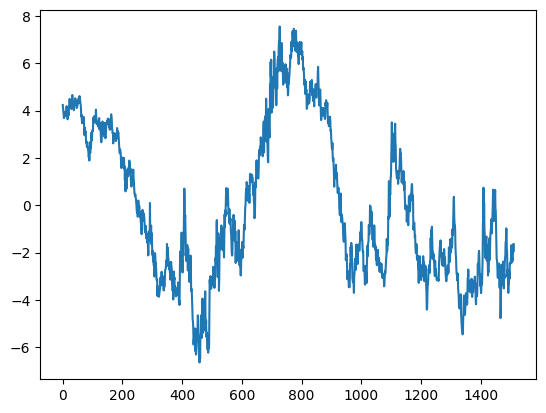

In [172]:
#only c[1] is positive. We take this one.
Z2 = np.array(price)-np.array(price2)*c[1]
Z2 = Z2-np.mean(Z2)
plt.plot(Z2)

In [178]:
#run Dickey-Fuller test
my_DF = stattools.adfuller(Z2,1,'c',None)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested
phi, sigma = linear_model.yule_walker(Z2,order=1)
print(phi)
print("not great")

-2.369954735407424
0.15039661640430563
1
[0.99071132]
not great


<function matplotlib.pyplot.show(close=None, block=None)>

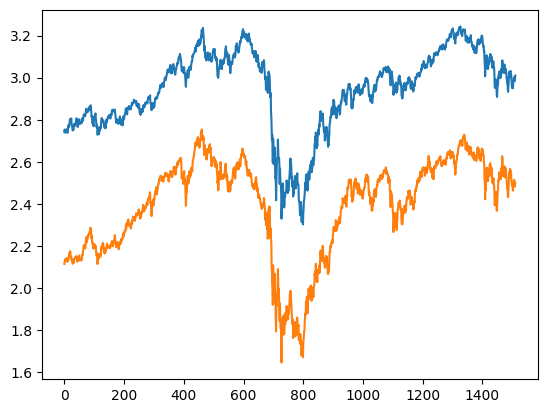

In [174]:
#We can compute the cointegration constant using regression on log prices 
logprice = np.log(price)
logprice2 = np.log(price2)
plt.plot(logprice)
plt.plot(logprice2)
plt.show

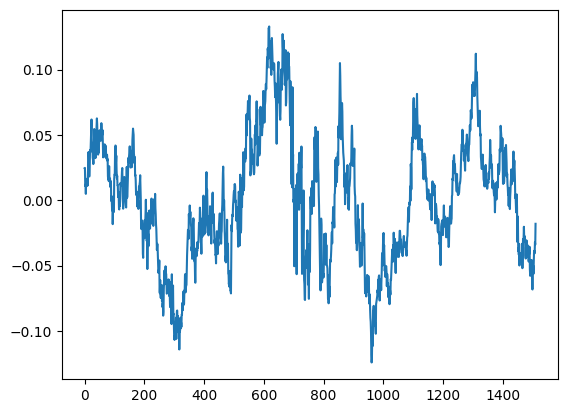

In [175]:
c3 = stats.linregress(logprice2,logprice)[0]
Z3 = np.array(logprice)-np.array(logprice2)*c3
Z3 = Z3-np.mean(Z3)
plt.plot(Z3)

In [176]:
#run Dickey-Fuller test
my_DF = stattools.adfuller(Z3,1,'c',None)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested

-3.9035726645090727
0.002008711022136972
1


In [177]:
phi, sigma = linear_model.yule_walker(Z3,order=1)
print(phi)

[0.97092681]
